### Table of Contents

#### [Introduction](#1)
#### [Importing Libraries](#2)
#### [Understanding Data](#3)
#### [Data Exploration](#4)
#### [Creating RFM Table](#5)
#### [Segmentation Customers](#6)
#### [Conclusion](#7)

### Introduction<a id=1></a>

When it comes to finding out who your best customers are, the old RFM matrix principle is the best. RFM stands for Recency, Frequency and Monetary. It is a customer segmentation technique that uses past purchase behavior to divide customers into groups.In this project we have been given a sales dataset from a supermarket. Customer will be segmented using RFM technique.

- **RECENCY (R)**: Days since last purchase
- **FREQUENCY (F)**: Total number of purchases
- **MONETARY VALUE (M)**: Total money this customer spent

### Importing Libraries<a id=2></a>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_excel("Online Retail.xlsx")

### Understanding Data<a id=3></a>

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
df.shape

(541909, 8)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [22]:
df = df[df["Country"]=="United Kingdom"]  ### We will analyse United Kingdom only.

### Data Exploration<a id=4></a>

In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
df.isnull().sum() #checking missing values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [25]:
df.dropna(inplace=True) # drop the missin values

In [26]:
df.isnull().sum()  # checked the missing values again since we dropped them there is no missing values in new dataset.

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [28]:
df.Quantity.min()  ## checked min quantity 

-80995

In [29]:
df.UnitPrice.min()

0.0

In [30]:
df = df[df.Quantity>0]

In [31]:
df.UnitPrice.min()

0.0

In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [34]:
df.shape

(354345, 8)

In [35]:
df.nunique()

InvoiceNo      16649
StockCode       3645
Description     3844
Quantity         294
InvoiceDate    15615
UnitPrice        403
CustomerID      3921
Country            1
dtype: int64

In [36]:
df["TotalPrice"] = df['Quantity'] * df['UnitPrice']

In [37]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [38]:
df['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [39]:
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [40]:
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [41]:
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [42]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

### Creating New Table with __Recency,Frequency,TotalPrice__ <a id=5></a>

In [43]:
rfm_table = df.groupby("CustomerID").agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})

In [46]:
rfm = rfm_table.rename(columns={"InvoiceDate":"Recency","InvoiceNo":"Frequency","TotalPrice":"Monetary_Value"})

In [47]:
rfm

,Recency,Frequency,Monetary_Value
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [48]:
rfm["R"] = pd.qcut(rfm["Recency"],5,labels=[5,4,3,2,1])

In [49]:
rfm["F"] = pd.qcut(rfm["Frequency"],5,labels=[1,2,3,4,5])

In [50]:
rfm["M"] = pd.qcut(rfm["Monetary_Value"],5,labels=[1,2,3,4,5])

In [51]:
rfm["RFM_Score"] = str(rfm["R"]) +str(rfm["F"]) + str(rfm["M"])

In [52]:
rfm.drop("RFM_Score",axis=1,inplace=True)

In [53]:
rfm

,Recency,Frequency,Monetary_Value,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,5
12747.0,2,103,4196.01,5,4,5
12748.0,0,4596,33719.73,5,5,5
12749.0,3,199,4090.88,5,5,5
12820.0,3,59,942.34,5,4,4
...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1
18281.0,180,7,80.82,1,1,1
18282.0,7,12,178.05,5,1,1


In [54]:
rfm['RFM_Score'] = rfm[['R', 'F',"M"]].astype(str).agg(''.join, axis=1)

In [55]:
rfm["R"]=rfm["R"].astype("int64")

In [56]:
rfm["F"]=rfm["F"].astype("int64")

In [57]:
rfm["M"]=rfm["M"].astype("int64")

In [58]:
rfm["RFM_Score"]=rfm["RFM_Score"].astype("int64")

In [59]:
rfm

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,5,115
12747.0,2,103,4196.01,5,4,5,545
12748.0,0,4596,33719.73,5,5,5,555
12749.0,3,199,4090.88,5,5,5,555
12820.0,3,59,942.34,5,4,4,544
...,...,...,...,...,...,...,...
18280.0,277,10,180.60,1,1,1,111
18281.0,180,7,80.82,1,1,1,111
18282.0,7,12,178.05,5,1,1,511


### Segmentation Customers<a id=6></a>

We will segment our data into 10 grups based on their RFM Score.

In [62]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [63]:
rfm['Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Recency,Frequency,Monetary_Value,R,F,M,RFM_Score,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,5,115,Hibernating
12747.0,2,103,4196.01,5,4,5,545,Champions
12748.0,0,4596,33719.73,5,5,5,555,Champions
12749.0,3,199,4090.88,5,5,5,555,Champions
12820.0,3,59,942.34,5,4,4,544,Champions


In [66]:
rfm[["Segment", "R","F","M"]].groupby("Segment").agg(["mean","count"])

R               F               M      
                         mean count      mean count      mean count
Segment                                                            
About to Sleep       3.000000   298  1.557047   298  1.963087   298
At Risk              1.630000   500  3.398000   500  3.048000   500
Can't Loose          1.756757    74  5.000000    74  4.283784    74
Champions            5.000000   555  4.666667   555  4.475676   555
Hibernating          1.408767   981  1.463812   981  1.830785   981
Loyal Customers      3.584488   722  4.469529   722  4.096953   722
Need Attention       3.000000   188  3.000000   188  2.973404   188
New Customers        5.000000    49  1.000000    49  1.734694    49
Potential Loyalists  4.409190   457  2.590810   457  2.805252   457
Promising            4.000000    97  1.000000    97  1.762887    97

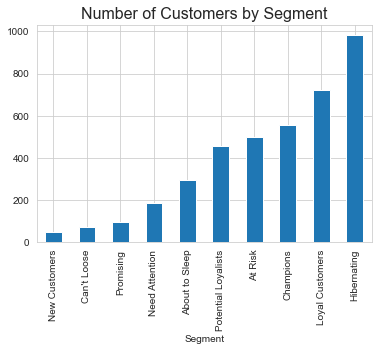

In [98]:
rfm.groupby("Segment").agg("count")["Recency"].sort_values().plot(kind="bar").set_title("Number of Customers by Segment",fontsize=16)
plt.show()

### Conclusion<a id=7></a>

We have segmented our Customers based on RFM Scores.Recency,Frequency and Monetary_Value.with the help of RFM analysis , We can create different marketing approach to certain group of customers.

RFM analysis helps us find answers to the following questions:
- Who are your best customers?
- Which of your customers could contribute to your churn rate?
- Who has the potential to become valuable customers?
- Which of your customers can be retained?
- Which of your customers are most likely to respond to engagement campaigns?

*Thank you*